In [94]:
import pickle
from pathlib import Path
from skimage import io

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# import keras library
import keras

# import Sequential from the keras models module
from keras.models import Sequential 

# import Dense, Dropout, Flatten, Conv2D, MaxPooling2D from the keras layers module
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

from PIL import Image

Example image has shape:  (376, 384, 3)
RGB values for the top left pixel are: [229 229 227]


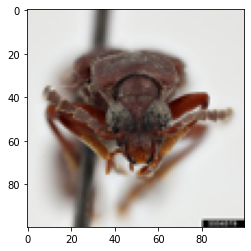

In [85]:
# load an image and explore
example_image = io.imread('insects/train/beetles/5556579.jpg')

# show image
plt.imshow(example_image)

# print shape
print('Example image has shape: ', example_image.shape)
                    
# print color channel values for top left pixel
print('RGB values for the top left pixel are:', example_image[0, 0])

In [95]:
# read all images for beetles dataset
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        imgg = Image.open(os.path.join(folder,filename))
        img = np.asarray(imgg.resize((100, 100)))
        if img is not None:
        
    # append to list of all images
            images.append(img)
            
    return images

In [96]:
beetles_folder = 'insects/train/beetles'
beetles = load_images_from_folder(beetles_folder)
beetles_label = np.ones(len(beetles))

In [97]:
dragonflies_folder = 'insects/train/dragonflies'
dragonflies = load_images_from_folder(beetles_folder)
dragonflies_label = np.zeros(len(beetles))

In [101]:
y = np.concatenate((beetles_label, dragonflies_label))
X = np.array(beetles + dragonflies)

In [102]:
beetles_test_folder = 'insects/test/beetles'
beetles_test = load_images_from_folder(beetles_folder)
beetles_test_label = np.ones(len(beetles))

In [103]:
dragonflies_test_folder = 'insects/test/dragonflies'
dragonflies_test = load_images_from_folder(beetles_folder)
dragonflies_test_label = np.zeros(len(beetles))

In [104]:
y_test = np.concatenate((beetles_test_label, dragonflies_test_label))
X_test = np.array(beetles_test + dragonflies_test)

In [112]:
# set model constants
num_classes = 1

# define model as Sequential
model = Sequential()

# first convolutional layer with 32 filters
# 1 input is 1 pixel
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 3)))
# add a second 2D convolutional layer with 64 filters
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu', input_shape = (100, 100, 3)))
# reduce dimensionality through max pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

# third convolutional layer with 64 filters
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# add dropout to prevent over fitting
model.add(Dropout(0.25))
# necessary flatten step preceeding dense layer
model.add(Flatten())
# fully connected layer
model.add(Dense(128, activation='relu'))

# add additional dropout to prevent overfitting
model.add(Dropout(0.5))

# prediction layers
model.add(Dense(num_classes, activation='sigmoid', name='preds'))

# show model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
dropout_8 (Dropout)          (None, 46, 46, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 135424)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [114]:
model.compile(
    # set the loss as binary_crossentropy
    loss=keras.losses.binary_crossentropy,
    # set the optimizer as stochastic gradient descent
    optimizer=keras.optimizers.SGD(lr=0.001),
    # set the metric as accuracy
    metrics=['accuracy']
)

# train the model using the first ten observations of the train and test sets
model.fit(X, y,
    epochs=5,
    verbose=1
)

Epoch 1/5
29/29 [==============================] - 11s 379ms/step - loss: nan - accuracy: 0.5000
Epoch 2/5
29/29 [==============================] - 11s 385ms/step - loss: nan - accuracy: 0.5000
Epoch 3/5
29/29 [==============================] - 12s 403ms/step - loss: nan - accuracy: 0.5000
Epoch 4/5
29/29 [==============================] - 12s 407ms/step - loss: nan - accuracy: 0.5000
Epoch 5/5
29/29 [==============================] - 11s 385ms/step - loss: nan - accuracy: 0.5000
